In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
!pip3 install catboost
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from google.colab import files 
from IPython.display import Image 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.2 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [5]:
dataTrain = Path("/content/drive/MyDrive/dataset/training_set")

In [6]:
filepath = list(dataTrain.glob(r"**/*.jpg"))

In [7]:
print(filepath[1])

/content/drive/MyDrive/dataset/training_set/Conscientiousness/IMG_20200215_174907.jpg


In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))
print(labels)

['Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Conscientiousness', 'Extraversion', 'Extraversion', 'Extraversion', 'Extraversion', 'Extraversion', 'Extraversion', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness', 'Openness

In [9]:
filepath = pd.Series(filepath, name='Filepath').astype(str)

In [10]:
print(labels[60])

Openness


In [11]:
labels = pd.Series(labels,name="Labels")

In [12]:
ListA = []
for i in filepath:
    image = cv2.imread(i,0)
    ListA.append(np.array(image,"uint8"))

In [13]:
ListA = pd.Series(ListA,name="Array")

In [14]:
MainData = pd.concat([ListA,labels],axis=1)

In [15]:
data = MainData.copy() # to protect main data

In [16]:
print(data["Labels"].value_counts())

Openness             50
Neuroticism          24
Agreeableness        24
Conscientiousness    22
Extraversion          6
Name: Labels, dtype: int64


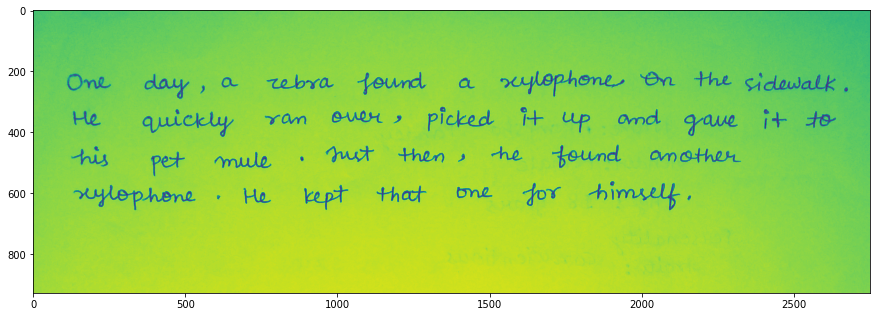

In [17]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data["Array"][10])

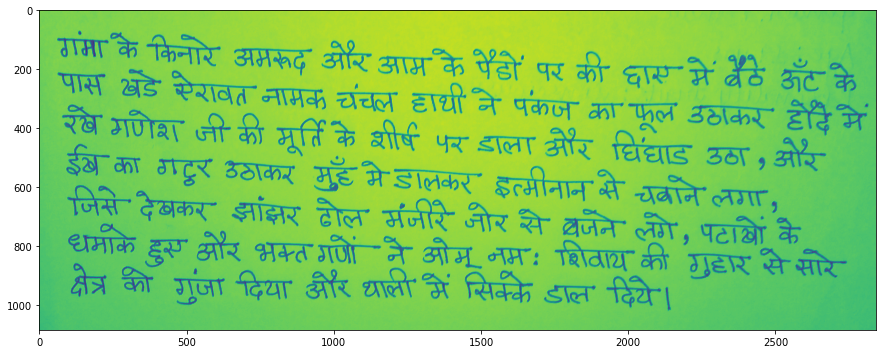

In [18]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data["Array"][5])

In [19]:
print(data.head())

                                               Array             Labels
0  [[121, 117, 134, 126, 125, 121, 120, 123, 123,...  Conscientiousness
1  [[178, 177, 176, 176, 181, 181, 178, 179, 179,...  Conscientiousness
2  [[180, 180, 182, 182, 180, 180, 181, 180, 179,...  Conscientiousness
3  [[176, 175, 174, 174, 175, 175, 175, 177, 175,...  Conscientiousness
4  [[144, 145, 143, 143, 145, 143, 140, 140, 141,...  Conscientiousness


In [20]:
SecondData = pd.concat([filepath,labels],axis=1)

In [21]:
print(SecondData)

                                              Filepath             Labels
0    /content/drive/MyDrive/dataset/training_set/Co...  Conscientiousness
1    /content/drive/MyDrive/dataset/training_set/Co...  Conscientiousness
2    /content/drive/MyDrive/dataset/training_set/Co...  Conscientiousness
3    /content/drive/MyDrive/dataset/training_set/Co...  Conscientiousness
4    /content/drive/MyDrive/dataset/training_set/Co...  Conscientiousness
..                                                 ...                ...
121  /content/drive/MyDrive/dataset/training_set/Ag...      Agreeableness
122  /content/drive/MyDrive/dataset/training_set/Ag...      Agreeableness
123  /content/drive/MyDrive/dataset/training_set/Ag...      Agreeableness
124  /content/drive/MyDrive/dataset/training_set/Ag...      Agreeableness
125  /content/drive/MyDrive/dataset/training_set/Ag...      Agreeableness

[126 rows x 2 columns]


In [22]:
x = SecondData["Filepath"]
y = SecondData["Labels"]

In [23]:
encode = LabelEncoder()

In [24]:
x = encode.fit_transform(x)

In [25]:
print(x)

[ 30  25  44  28  32  37  33  31  27  26  40  35  43  38  41  29  34  45
  42  36  24  39  50  48  47  51  46  49  77  76  78 111 106 101  97  84
  92  88 117  96 113  98 104  79  93  80  89  95  85 115  87 108 100 103
  81 109 107  99  91 110  94  82  86  90 119 118 120 116 114 112 102 105
  83 121 124 123 122 125  61  60  62  53  56  59  57  63  55  52  58  54
  68  66  74  75  69  71  72  70  64  67  73  65  22  14  11  12   4   6
  17  13   5  10   3  16  20   9  19  23   0   1  21   7  15   2   8  18]


In [26]:
y = encode.fit_transform(y)

In [27]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
print(x.shape)

(126,)


In [29]:
print(y.shape)

(126,)


In [30]:
x = np.asarray(x).astype("float32")
x = x.reshape(126,1,1)

In [31]:
y = np.asarray(y).astype("float32")
y = y.reshape(126,1,1)

In [32]:
print(len(x))

126


In [33]:
print(len(y))

126


In [34]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.1,random_state=42)

In [35]:
print(xTrain.shape)

(113, 1, 1)


In [36]:
print(xTest.shape)

(13, 1, 1)


In [37]:
print(yTrain.shape)

(113, 1, 1)


In [38]:
print(yTest.shape)

(13, 1, 1)


In [39]:
ANNmodel = tf.keras.models.Sequential([
  # inputs 
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(113,)),
  # hiddens layers
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(5,activation="softmax")
])

lossfunc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

ANNmodel.compile(optimizer='rmsprop', loss=lossfunc, metrics=['accuracy'])

In [40]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [41]:
MainModel = ANNmodel.fit(xTrain, yTrain,epochs=30, batch_size=5 ,callbacks=Callback ,validation_data=(xTest,yTest))

Epoch 1/30
23/23 [==============================] - 1s 15ms/step - loss: 1.5381 - accuracy: 0.3628 - val_loss: 1.3868 - val_accuracy: 0.5385
Epoch 2/30
23/23 [==============================] - 0s 4ms/step - loss: 1.4368 - accuracy: 0.3805 - val_loss: 1.2415 - val_accuracy: 0.5385
Epoch 3/30
23/23 [==============================] - 0s 4ms/step - loss: 1.3749 - accuracy: 0.3805 - val_loss: 1.1577 - val_accuracy: 0.5385
Epoch 4/30
23/23 [==============================] - 0s 4ms/step - loss: 1.3498 - accuracy: 0.3805 - val_loss: 1.0884 - val_accuracy: 0.5385
Epoch 5/30
23/23 [==============================] - 0s 5ms/step - loss: 1.2948 - accuracy: 0.3805 - val_loss: 1.0359 - val_accuracy: 0.5385


In [42]:
result_Model = ANNmodel.evaluate(xTest,yTest)

1/1 [==============================] - 0s 32ms/step - loss: 1.0359 - accuracy: 0.5385


In [43]:
print(ANNmodel.summary())
print(ANNmodel.predict([[xTest[-1]]]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 1, 1)              0         
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 128)               256       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 3

1/1 [==============================] - 0s 128ms/step
[[0.0869858  0.11965348 0.06645818 0.18020107 0.5467015 ]]


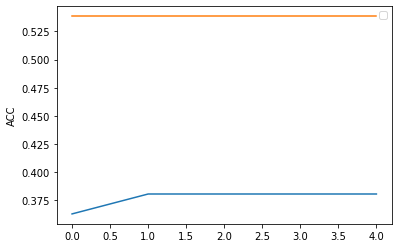

In [44]:
plt.plot(MainModel.history["accuracy"])
plt.plot(MainModel.history["val_accuracy"])
plt.ylabel("ACC")
plt.legend()
plt.show()

In [45]:
HistoryDict = MainModel.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

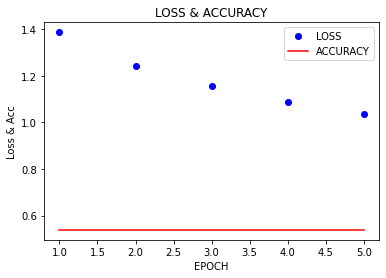

In [46]:
plt.plot(epochs,val_losses,"bo",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()

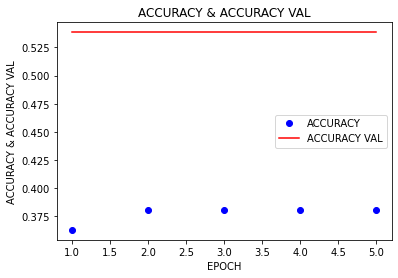

In [47]:
plt.plot(epochs,acc,"bo",label="ACCURACY")
plt.plot(epochs,val_acc,"r",label="ACCURACY VAL")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

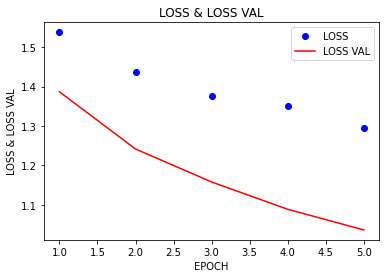

In [48]:
plt.plot(epochs,losses,"bo",label="LOSS")
plt.plot(epochs,val_losses,"r",label="LOSS VAL")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

In [ ]:
upload = files.upload()
lamda1 = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], upload))
filename = pd.Series(upload, name='newFile').astype(str)
upload1 = encode.fit_transform(filename)
upload2 = np.asarray(upload1).astype("float32")
upload3 = upload2.reshape(-1,1)
your_ans = ANNmodel.predict([[upload3]])
your_ans = your_ans * 100
print("                                    your traits                                      ")
print("-------------------------------------------------------------------------------------")
print("openness:", your_ans[0][0], "%")
print("Neuroticism: ", your_ans[0][1], "%")
print("Extrovert: ", your_ans[0][2], "%")
print("Diligent: ", your_ans[0][3], "%")
print("Balanced: ", your_ans[0][4], "%")

print(your_ans)
